In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Đọc file CSV actual
actual_data = pd.read_csv("/Users/nghiempt/Src/Research/conf_a&p_2025/scenario/case-07/data/150-test-actual.csv")

# Đọc file CSV predict
predict_data = pd.read_csv("/Users/nghiempt/Src/Research/conf_a&p_2025/scenario/case-07/data/150-test-ft-process.csv")

# Xử lý dữ liệu
actual_data = actual_data[["incorrect", "incomplete", "inconsistent"]]
predict_data = predict_data[["incorrect", "incomplete", "inconsistent"]]

In [3]:
for column in actual_data.columns:
    # Tạo Confusion Matrix
    cm = confusion_matrix(actual_data[column], predict_data[column])

    # Tính toán precision, recall, f1, accuracy
    precision = precision_score(actual_data[column], predict_data[column])
    recall = recall_score(actual_data[column], predict_data[column])
    f1 = f1_score(actual_data[column], predict_data[column])
    accuracy = accuracy_score(actual_data[column], predict_data[column])

    # Hiển thị kết quả
    print(f"Kết quả cho cột {column}:")
    print(cm)
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1: {f1:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print()

Kết quả cho cột incorrect:
[[  3  10]
 [  0 137]]
Precision: 0.932
Recall: 1.000
F1: 0.965
Accuracy: 0.933

Kết quả cho cột incomplete:
[[  9  20]
 [  1 120]]
Precision: 0.857
Recall: 0.992
F1: 0.920
Accuracy: 0.860

Kết quả cho cột inconsistent:
[[87 11]
 [31 21]]
Precision: 0.656
Recall: 0.404
F1: 0.500
Accuracy: 0.720



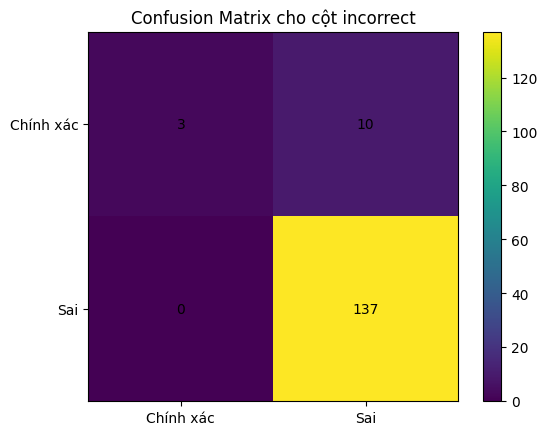

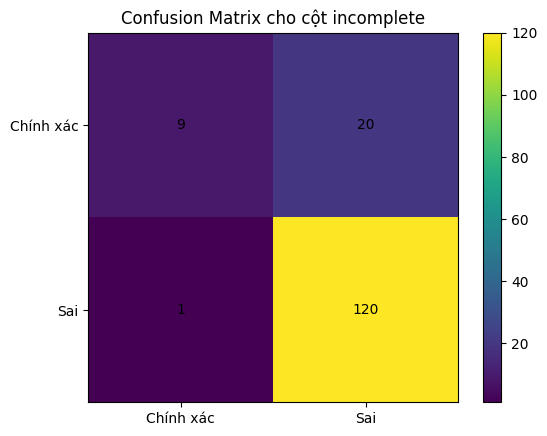

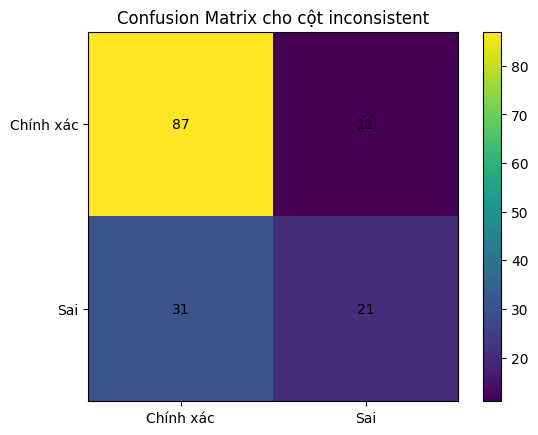

In [4]:
def plot_confusion_matrix(cm, title):
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()

    # Hiển thị tên lớp
    classes = ['Chính xác', 'Sai']
    plt.xticks(range(len(classes)), classes)
    plt.yticks(range(len(classes)), classes)

    # Hiển thị giá trị trên Confusion Matrix
    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i, j], ha='center', va='center')

    plt.show()

# Visualization Confusion Matrix cho từng cột
for column in actual_data.columns:
    cm = confusion_matrix(actual_data[column], predict_data[column])
    plot_confusion_matrix(cm, f"Confusion Matrix cho cột {column}")